In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv("..\\data\\AAME.csv")

In [3]:
df = df.drop(columns=['Date', 'Adj Close', 'Volume'])

In [6]:
df = df[df['Open'] != 0]
df = df.dropna()
df_trimmed = df[["Close"]]

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_trimmed)

In [10]:
def make_sample(data, window):
    train, target = [], []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

In [12]:
window_size = 10
X, y = make_sample(scaled_data, window_size)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(window_size, 1)), 
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0040 - val_loss: 1.0812e-04
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.9185e-04 - val_loss: 1.0101e-04
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.3383e-04 - val_loss: 1.0241e-04
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.8556e-04 - val_loss: 2.2558e-04
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.0457e-04 - val_loss: 8.2138e-05
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.7440e-04 - val_loss: 7.6122e-05
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.8586e-04 - val_loss: 6.9398e-05
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.7011e-04 - val_loss: 6.5995e-05
Epoch 9/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.6629e-04 - val_loss: 6.4530e-05
Epoch 10/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.3033e-04 - val_loss: 6.2051e-05
Epoch 11/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.

In [17]:
predicted = model.predict(X_test)
predicted_inv = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


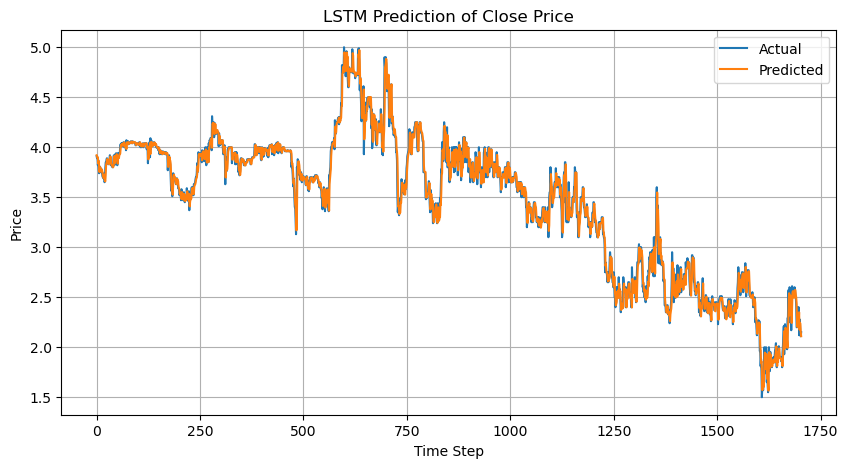

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(predicted_inv, label='Predicted')
plt.title('LSTM Prediction of Close Price')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_inv, predicted_inv))
mae = mean_absolute_error(y_test_inv, predicted_inv)
r2 = r2_score(y_test_inv, predicted_inv)

print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

🔹 RMSE: 0.1016
🔹 MAE: 0.0684
🔹 R² Score: 0.9788
